In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np
import seaborn as sns
from collections import defaultdict
import os
import pickle
import json
import cv2

In [2]:
# create giant dictionary for all data
data_dir = 'mmhs150k/'

# load data and print sizes
tweet_dict = json.load(open(data_dir + 'MMHS150K_GT.json', 'r'))
print('Length of Tweet Dictionary:', len(tweet_dict))

# initialize data dictionary
data_dict = dict()
for k, v in tweet_dict.items(): data_dict[k] = {'tweet_text': v['tweet_text'], 'labels': v['labels']}

Length of Tweet Dictionary: 149823


Number of Positive Votes: 0 Tweet Count: 57931
Number of Positive Votes: 1 Tweet Count: 54923
Number of Positive Votes: 2 Tweet Count: 28395
Number of Positive Votes: 3 Tweet Count: 8574


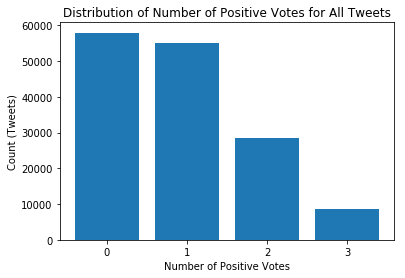

In [4]:
# plot disagreements (positive vs negative)
vote_dict = defaultdict(lambda: 0)
for k, v in data_dict.items():
    votes = [0 if vote == 0 else 1 for vote in v['labels']]
    vote_dict[sum(votes)] += 1
    
for k, v in vote_dict.items():
    print('Number of Positive Votes:', k, 'Tweet Count:', v)

plt.bar([str(x) for x in vote_dict.keys()], vote_dict.values())
plt.ylabel('Count (Tweets)')
plt.xlabel('Number of Positive Votes')
plt.title('Distribution of Number of Positive Votes for All Tweets')
plt.show()

In [5]:
print(sum(vote_dict.values()))

149823
